# Family-Friendly Neighborhoods in San Francisco, USA

## Index
<ul>
    <li>Introduction</li>
    <li>Data<li>

In [1]:
import pandas as pd
import numpy as np
import folium
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
import json
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans

Initializing the dataframe

In [2]:
sf_crime_data = pd.read_csv('SF_crime_data.csv')
sf_crime_data.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2020/05/12 05:45:00 PM,2020/05/12,17:45,2020,Tuesday,2020/05/13 09:46:00 AM,92897328150,928973,206082743,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/05/19 09:00:00 PM,2020/05/19,21:00,2020,Tuesday,2020/05/20 05:43:00 PM,92899306244,928993,206082709,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/05/16 06:00:00 PM,2020/05/16,18:00,2020,Saturday,2020/05/16 10:26:00 PM,92902428150,929024,206083296,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/03/30 12:00:00 AM,2020/03/30,00:00,2020,Monday,2020/05/04 11:47:00 AM,92905305073,929053,206062193,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/02/03 02:45:00 PM,2020/02/03,14:45,2020,Monday,2020/02/03 05:50:00 PM,89881675000,898816,200085557,200342870.0,...,41.0,10.0,8.0,16.0,NaN,NaN,NaN,NaN,NaN,2.0


Drop the unnecessary fields from the dataframe

In [3]:
sf_crime_data.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'point', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File',
       'Areas of Vulnerability, 2016'],
      dtype='object')

In [4]:
sf_crime_data.drop(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year', 'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident Number', 'CAD Number', 'Report Type Code', 'Report Type Description', 'Filed Online', 'Incident Code', 'Incident Category', 'Incident Subcategory', 'Incident Description', 'Resolution', 'Intersection', 'CNN', 'Police District', 'Supervisor District', 'point', 'SF Find Neighborhoods', 'Current Police Districts', 'Current Supervisor Districts', 'Analysis Neighborhoods', 'HSOC Zones as of 2018-06-05', 'OWED Public Spaces', 'Central Market/Tenderloin Boundary Polygon - Updated', 'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File', 'Areas of Vulnerability, 2016'], axis=1, inplace=True)
sf_crime_data.head()

,Incident ID,Analysis Neighborhood,Latitude,Longitude
0,928973,NaN,NaN,NaN
1,928993,NaN,NaN,NaN
2,929024,NaN,NaN,NaN
3,929053,NaN,NaN,NaN
4,898816,Lakeshore,37.72695,-122.476039


In [5]:
sf_crime_data.rename(columns={'Analysis Neighborhood':'Neighborhood'}, inplace=True)     #changing the name of column Analysis Neighborhood
sf_crime_data.head()

,Incident ID,Neighborhood,Latitude,Longitude
0,928973,NaN,NaN,NaN
1,928993,NaN,NaN,NaN
2,929024,NaN,NaN,NaN
3,929053,NaN,NaN,NaN
4,898816,Lakeshore,37.72695,-122.476039


#### Drop all the rows where Neighborhood is unknown

In [6]:
sf_crime_data = sf_crime_data[sf_crime_data['Neighborhood'].notna()]
sf_crime_data.head()

,Incident ID,Neighborhood,Latitude,Longitude
4,898816,Lakeshore,37.726950,-122.476039
6,898607,Mission,37.752440,-122.415172
7,898672,Financial District/South Beach,37.784560,-122.407337
9,898773,Pacific Heights,37.787112,-122.440250
10,898762,Financial District/South Beach,37.796926,-122.399508


Reset the Index values in the dataframe

In [7]:
sf_crime_data.reset_index(drop=True, inplace=True)

In [8]:
sf_crime_data.head()

,Incident ID,Neighborhood,Latitude,Longitude
0,898816,Lakeshore,37.726950,-122.476039
1,898607,Mission,37.752440,-122.415172
2,898672,Financial District/South Beach,37.784560,-122.407337
3,898773,Pacific Heights,37.787112,-122.440250
4,898762,Financial District/South Beach,37.796926,-122.399508


Group the crime data by neighborhood

In [9]:
sf_crime_data_group = sf_crime_data.groupby(['Neighborhood'], as_index=False).agg({'Latitude':'mean', 'Longitude':'mean', 'Incident ID':'sum'})

In [10]:
sf_crime_data_group.head()

,Neighborhood,Latitude,Longitude,Incident ID
0,Bayview Hunters Point,37.732943,-122.390954,15714886164
1,Bernal Heights,37.741410,-122.416379,4689263306
2,Castro/Upper Market,37.763186,-122.432706,8062556609
3,Chinatown,37.796527,-122.407235,5278359954
4,Excelsior,37.720130,-122.433183,4262291803


In [11]:
sf_crime_count = sf_crime_data.groupby(['Neighborhood']).count()

In [12]:
sf_crime_count.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
sf_crime_count.rename(columns={'Incident ID':'Count'}, inplace=True)
sf_crime_count.head()

,Count
Neighborhood,
Bayview Hunters Point,20046
Bernal Heights,5972
Castro/Upper Market,10353
Chinatown,6767
Excelsior,5476


In [13]:
sf_crime_count.reset_index(inplace=True)
sf_crime_count.head()

,Neighborhood,Count
0,Bayview Hunters Point,20046
1,Bernal Heights,5972
2,Castro/Upper Market,10353
3,Chinatown,6767
4,Excelsior,5476


In [14]:
sf_crime_grouped = sf_crime_data_group.merge(sf_crime_count, on='Neighborhood', how='inner')
sf_crime_grouped.head()

,Neighborhood,Latitude,Longitude,Incident ID,Count
0,Bayview Hunters Point,37.732943,-122.390954,15714886164,20046
1,Bernal Heights,37.741410,-122.416379,4689263306,5972
2,Castro/Upper Market,37.763186,-122.432706,8062556609,10353
3,Chinatown,37.796527,-122.407235,5278359954,6767
4,Excelsior,37.720130,-122.433183,4262291803,5476


In [15]:
sf_crime_grouped.drop('Incident ID', axis=1, inplace=True)
sf_crime_grouped.head()

,Neighborhood,Latitude,Longitude,Count
0,Bayview Hunters Point,37.732943,-122.390954,20046
1,Bernal Heights,37.741410,-122.416379,5972
2,Castro/Upper Market,37.763186,-122.432706,10353
3,Chinatown,37.796527,-122.407235,6767
4,Excelsior,37.720130,-122.433183,5476


Mapping the above data

In [16]:
geolocator = Nominatim(user_agent='sf_explorer')
location1 = geolocator.geocode('San Francisco, US')
sf_lat = location1.latitude
sf_lon = location1.longitude

In [17]:
sf_map = folium.Map(location=[sf_lat, sf_lon], zoom_start=12)
for lat, lng, post, crime in zip(sf_crime_grouped['Latitude'], sf_crime_grouped['Longitude'], sf_crime_grouped['Neighborhood'], sf_crime_grouped['Count']):
    label = '{}: Crime: {}'.format(post, crime)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([lat, lng], 
                        radius = 4, 
                        popup = label, 
                        color = 'blue', 
                        fill = True, 
                        fill_opacity = 0.6, 
                       parse_html = False).add_to(sf_map)
sf_map

In [18]:
sf_crime_grouped.describe()

,Latitude,Longitude,Count
count,41.000000,41.000000,41.000000
mean,37.765557,-122.435187,8252.951220
std,0.028849,0.030042,9310.265767
min,37.712351,-122.498417,349.000000
25%,37.741410,-122.456210,3553.000000
50%,37.772392,-122.432706,5521.000000
75%,37.785546,-122.414493,9350.000000
max,37.824155,-122.372732,38921.000000


<b>Quick Analysis</b>: 50% crimes in Sanfrancisco is between 3553 and 9350 with average being 8253

Visualizing the data as a BoxPlot

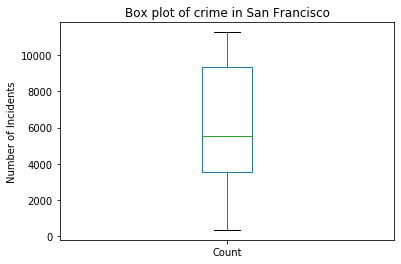

In [19]:
sf_crime_grouped['Count'].plot(kind='box', showfliers=False)
plt.title("Box plot of crime in San Francisco")
plt.ylabel('Number of Incidents')
plt.show()

Map the data, assuming anything between the interquartile range is average crime numbers. Below the interquartile range is considered low crime rate (safe), and anything above is considered high crime rate areas(unsafe)

In [20]:
sf_crime_map = folium.Map(location=[sf_lat, sf_lon], zoom_start=12)
for lat, lng, post, crime in zip(sf_crime_grouped['Latitude'], sf_crime_grouped['Longitude'], sf_crime_grouped['Neighborhood'], sf_crime_grouped['Count']):
    label = '{}: Crime: {} incidents'.format(post, crime)
    label = folium.Popup(label, parse_html = True)
    if int(crime) < 3553:
        color="green" 
    elif int(crime) >  9350:
        color = "red"
    else: 
        color="orange"
    folium.CircleMarker([lat, lng], 
                        radius = 4, 
                        popup = label, 
                        color = color,
                        fill = True, 
                        fill_opacity = 0.6, 
                        parse_html = False).add_to(sf_crime_map)
sf_crime_map

## Venue search

Parks (Category Id: '4bf58dd8d48988d163941735')

Libraries (Category Id: '4bf58dd8d48988d12f941735')

Playgrounds (Category Id: '4bf58dd8d48988d1e7941735')

In [21]:
#define variables to connect to Foursquare api
CLIENT_ID = 'R2EZF1AKVB3G2WJH5K4XXOOTZ3SIJQR5Y1HBSAFBRUDYSEZW'
CLIENT_SECRET = 'H3UGAIUK4ROSVAN5SM1FYMYBMGPLMIEL22WYEIE3JCPQCFOC'
VERSION = '20200605'
LIMIT = 100
radius = 1000

Function to count nuber of each type of venue San Francisco Neighborhoods

In [22]:
def venue_numbers(ID, category):
    for i in range(len(sf_crime_grouped)):
        
        lat = sf_crime_grouped.iloc[i, 1]
        lon = sf_crime_grouped.iloc[i, 2]
        
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,lat,lon,VERSION,ID,radius,LIMIT)
        
        results = requests.get(url).json()
        venue = results['response']['venues']
        
        count = np.shape(venue)
    
        sf_crime_grouped.loc[i, category] = count[0]

Create columns for each venue type

In [23]:
sf_crime_grouped['Park'] = ''
sf_crime_grouped['Libraries'] = ''
sf_crime_grouped['Playgrounds'] = ''
sf_crime_grouped.head()

,Neighborhood,Latitude,Longitude,Count,Park,Libraries,Playgrounds
0,Bayview Hunters Point,37.732943,-122.390954,20046,,,
1,Bernal Heights,37.741410,-122.416379,5972,,,
2,Castro/Upper Market,37.763186,-122.432706,10353,,,
3,Chinatown,37.796527,-122.407235,6767,,,
4,Excelsior,37.720130,-122.433183,5476,,,


In [24]:
venue_numbers('4bf58dd8d48988d163941735','Park')
venue_numbers( '4bf58dd8d48988d12f941735','Libraries')
venue_numbers('4bf58dd8d48988d1e7941735','Playgrounds')

sf_crime_grouped.head()

,Neighborhood,Latitude,Longitude,Count,Park,Libraries,Playgrounds
0,Bayview Hunters Point,37.732943,-122.390954,20046,8,2,5
1,Bernal Heights,37.741410,-122.416379,5972,17,2,12
2,Castro/Upper Market,37.763186,-122.432706,10353,42,5,22
3,Chinatown,37.796527,-122.407235,6767,45,20,18
4,Excelsior,37.720130,-122.433183,5476,8,3,6


In [25]:
sf_crime_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  41 non-null     object 
 1   Latitude      41 non-null     float64
 2   Longitude     41 non-null     float64
 3   Count         41 non-null     int64  
 4   Park          41 non-null     object 
 5   Libraries     41 non-null     object 
 6   Playgrounds   41 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.8+ KB


## Clustering

In [26]:
cluster_data = sf_crime_grouped.iloc[:, 3:]
cluster_data.head()

,Count,Park,Libraries,Playgrounds
0,20046,8,2,5
1,5972,17,2,12
2,10353,42,5,22
3,6767,45,20,18
4,5476,8,3,6


Determine optimal number of K(clusters) using elbow method

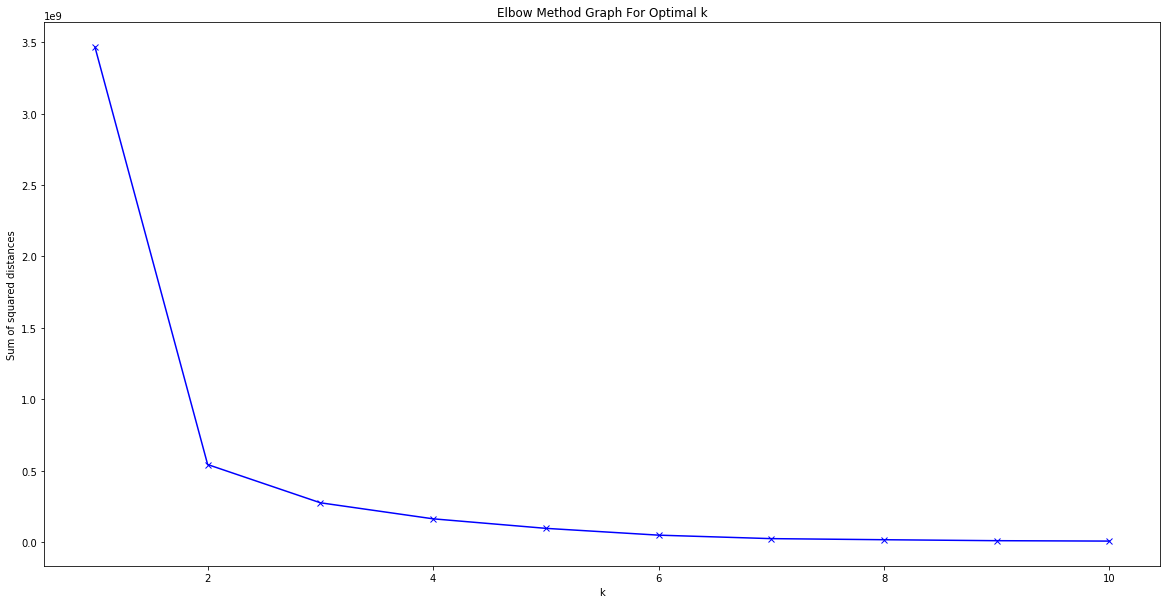

In [27]:
elbow = []
for k in range(1,len(cluster_data)):
    km = KMeans(n_clusters = k, random_state = 0).fit(cluster_data)
    elbow.append(km.inertia_) 
elbow2 = elbow[0:10]
K = range(1,11)
plt.figure(figsize =(20,10))
plt.plot(K,  elbow2,'bx-')
plt.xlabel('k')  
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method Graph For Optimal k')
plt.show()


From the above graph we can see that the optimal number od clusters is <b>3</b>

In [28]:
k = 3
sf_kmean = KMeans(n_clusters = k, random_state = 0).fit(cluster_data)

In [29]:
sf_crime_grouped.insert(0,'Cluster_Labels', sf_kmean.labels_)
sf_crime_grouped.head()

,Cluster_Labels,Neighborhood,Latitude,Longitude,Count,Park,Libraries,Playgrounds
0,2,Bayview Hunters Point,37.732943,-122.390954,20046,8,2,5
1,1,Bernal Heights,37.741410,-122.416379,5972,17,2,12
2,2,Castro/Upper Market,37.763186,-122.432706,10353,42,5,22
3,1,Chinatown,37.796527,-122.407235,6767,45,20,18
4,1,Excelsior,37.720130,-122.433183,5476,8,3,6


In [30]:
sf_crime_grouped.head(49)

,Cluster_Labels,Neighborhood,Latitude,Longitude,Count,Park,Libraries,Playgrounds
0,2,Bayview Hunters Point,37.732943,-122.390954,20046,8,2,5
1,1,Bernal Heights,37.741410,-122.416379,5972,17,2,12
2,2,Castro/Upper Market,37.763186,-122.432706,10353,42,5,22
3,1,Chinatown,37.796527,-122.407235,6767,45,20,18
4,1,Excelsior,37.720130,-122.433183,5476,8,3,6
5,0,Financial District/South Beach,37.789277,-122.401001,30991,43,18,17
6,1,Glen Park,37.738081,-122.433421,1731,24,2,10
7,1,Golden Gate Park,37.769732,-122.467805,3604,48,4,13
8,1,Haight Ashbury,37.769630,-122.444380,5706,37,8,21
9,2,Hayes Valley,37.775219,-122.427559,9350,37,23,24


### Map  the clustered data

In [31]:
cluster_map = folium.Map(location = [sf_lat, sf_lon], zoom_start = 12)
for lat, lng, neigh, crime, cluster in zip(sf_crime_grouped['Latitude'], sf_crime_grouped['Longitude'], sf_crime_grouped['Neighborhood'], sf_crime_grouped['Count'], sf_crime_grouped['Cluster_Labels']):
    label = 'Neighborhood:{},Crime:{}'.format(neigh, crime)
    label = folium.Popup(label, parse_html = True)
    if cluster == 1:
        color="green" 
    elif cluster == 0:
        color = "red"
    else: 
        color="orange"
    folium.CircleMarker([lat, lng], 
                        radius = 4, 
                        popup = label, 
                        color = color,
                        fill = True, 
                        fill_opacity = 0.6, 
                        parse_html = False).add_to(cluster_map)
cluster_map


# Results

In [32]:
good_neighborhoods = sf_crime_grouped[sf_crime_grouped['Cluster_Labels'] == 1]
bad_neighborhoods = sf_crime_grouped[sf_crime_grouped['Cluster_Labels'] == 2]
worst_neighborhoods= sf_crime_grouped[sf_crime_grouped['Cluster_Labels'] == 0]
print( 'Number of Family Friendly Neighborhoods in San Francisco: ', len(good_neighborhoods))
print( 'Number of Neighborhoods to Avoid in San Francisco: ', len(worst_neighborhoods))
print( 'Number of Neighborhoods to be Cautious of in San Francisco: ', len(bad_neighborhoods))

Number of Family Friendly Neighborhoods in San Francisco:  27
Number of Neighborhoods to Avoid in San Francisco:  4
Number of Neighborhoods to be Cautious of in San Francisco:  10


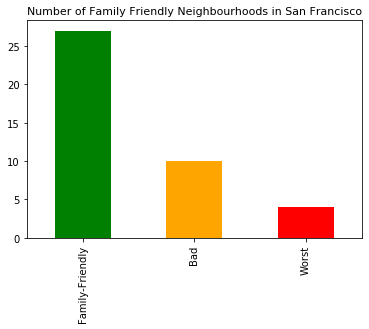

In [33]:
#Bar graph of above data
sf_crime_grouped['Cluster_Labels'].value_counts().plot(kind = 'bar', color =['green', 'orange', 'red'])
plt.title('Number of Family Friendly Neighbourhoods in San Francisco', fontsize = 11)
plt.xticks(np.arange(3), ('Family-Friendly', 'Bad', 'Worst'))
plt.show()

In [34]:
#Worst neighborhoods in San Francisco
worst_neighborhoods['Neighborhood']

5     Financial District/South Beach
18                           Mission
33                   South of Market
35                        Tenderloin
Name: Neighborhood, dtype: object

In [35]:
sf_geodata = r'neighborhood_geodata.json'
sf_map2 = folium.Map(location=[sf_lat, sf_lon], zoom_start=12)

In [36]:
#chropleth map from the above data
sf_map2.choropleth(
    geo_data=sf_geodata,
    data=sf_crime_grouped,
    columns=['Neighborhood', 'Cluster_Labels'],
    key_on='feature.properties.nhood',
    fill_color='PuBuGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    
)

# display map
sf_map2

C:\Users\vishv\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
